# Exam 2017

### [pokemon.csv](pokemon.csv)

In this file, each row represents the features of one Pokémon.

* pid: Numeric - ID of the Pokémon
* HP: Numeric - Health points
* Attack: Numeric - Strength of the regular attack
* Defense: Numeric - Strength of the regular defense
* Sp. Atk: Numeric - Strength of the special attack
* Sp. Def: Numeric - Strength of the special defense
* Speed: Numeric - Moving speed
* Legendary: Boolean - ‘True’ if the Pokémon is rare
* Class 1: Categorical - Pokémon class
* Class 2: Categorical - Pokémon class

Please note that a Pokémon can have either one or two classes. If a Pokémon has two classes, they are both considered to have the same importance.


### [combats.csv](combats.csv)

In this file, each row represents the outcome of one battle between two Pokémon.

* First_pokemon: Numeric - ID (match with pid)
* Second_pokemon: Numeric - ID (match with pid)
* Winner: Numeric - ID of the winner

In [298]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import cross_val_score

## Question 1: Exploring the data - 30 points
In this part, you will explore the data to address the curiosities of the demanding Professor Oak.

1. (6 points) Explore the data and report some descriptive statistics (e.g., use df.describe(), report the number of classes, summarize the attack and defense distributions, etc.). This will be useful later in your analysis.

In [4]:
#load the data
pokemon_df = pd.read_csv("data\pokemon.csv")
combats_df = pd.read_csv("data\combats.csv")

In [47]:
pokemon_df.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [31]:
# statistics of numerical values
pokemon_df.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


<Axes: title={'center': 'Histogram of the Pokemon attack distribution'}, xlabel='strenght of the attack', ylabel='Frequency'>

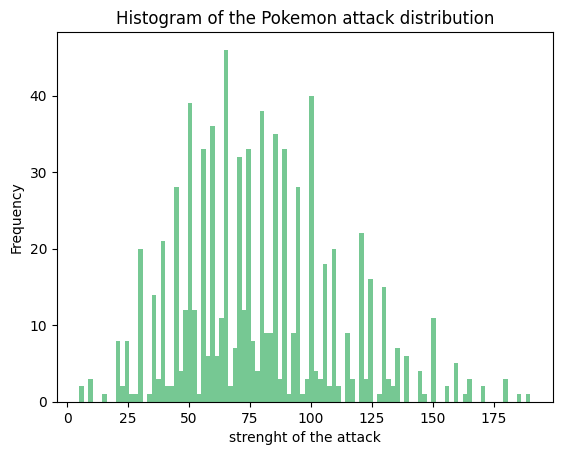

In [45]:
pokemon_df['Attack'].plot.hist(bins=100, color="#76c893", title="Histogram of the Pokemon attack distribution", 
                               xlabel="strenght of the attack")

<Axes: title={'center': 'Histogram of the Pokemon defense distribution'}, xlabel='strenght of the defense', ylabel='Frequency'>

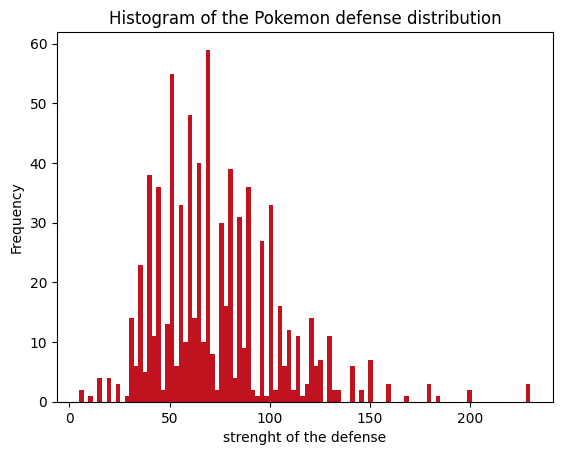

In [41]:
pokemon_df['Defense'].plot.hist(bins=100, color="#c1121f", title="Histogram of the Pokemon defense distribution", 
                               xlabel="strenght of the defense")

In [22]:
classes = pd.concat([pokemon_df['Class 1'], pokemon_df['Class 2']])
print("The different classes are ", classes.unique())
print("There are ", len(classes.unique()), " different classes")

The different classes are  ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying' nan]
There are  19  different classes


In [24]:
combats_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


2. (4 points) Compare the probability distribution of the “regular attack” feature with that of the “regular defense” feature. In particular,
   1. visualize the relation between these two variables using an appropriate plot;
   2. list the names of the 3 Pokémon with highest attack-over-defense ratio;
   3. list the names of the 3 Pokémon with lowest attack-over-defense ratio;
   4. list the names of the 10 Pokémon with the largest number of victories.

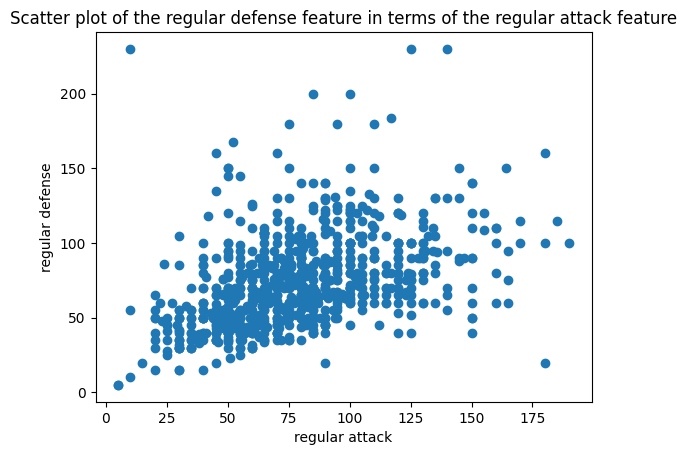

In [55]:
# relation between regular attack an regular defense
# use scatter plot to visualize relation between two variable
plt.figure()
plt.scatter(x=pokemon_df['Attack'], y=pokemon_df['Defense'])
plt.xlabel("regular attack")
plt.ylabel("regular defense")
plt.title("Scatter plot of the regular defense feature in terms of the regular attack feature")
plt.show()

In [61]:
# compute the attack over defense ratio 
pokemon_df["Attack/Defense ratio"] = pokemon_df["Attack"]/pokemon_df["Defense"]

In [77]:
# list the names of the 3 Pokémon with highest attack-over-defense ratio
high_attack_defense = pokemon_df.sort_values("Attack/Defense ratio", ascending=False)
#high_attack_defense.head(3)
print(high_attack_defense[:3]["Name"])

429    DeoxysAttack Forme
347              Carvanha
19          Mega Beedrill
Name: Name, dtype: object


In [79]:
# list the names of the 3 Pokémon with lowest attack-over-defense ratio
low_attack_defense = pokemon_df.sort_values("Attack/Defense ratio", ascending=True)
#low_attack_defense.head(3)
print(low_attack_defense[:3]["Name"])

230     Shuckle
139    Magikarp
484     Bronzor
Name: Name, dtype: object


In [209]:
#list the names of the 10 Pokémon with the largest number of victories.
victories = combats_df["Winner"].value_counts().sort_values(ascending=False)
#print(victories[:10].index)

top10_victories = []
for pid in list(victories[:10].index):
    top10_victories.append(pokemon_df[pokemon_df["pid"] == pid]["Name"])

#print(top10_victories)


#cleaner list
id_to_name = pokemon_df.set_index("pid")["Name"]  # Create a mapping from IDs to Names
top10_victories = [id_to_name[pid] for pid in victories[:10].index]  # Map the IDs to their names

# Print the top 10 Pokémon names
print(top10_victories)


['Mewtwo', 'Aerodactyl', 'Infernape', 'Jirachi', 'Deoxys Speed Forme', 'Slaking', 'Murkrow', 'Mega Absol', 'Mega Houndoom', 'Mega Aerodactyl']


3. (10 points) Professor Oak suspects that Pokémon in the _grass_ class have a stronger regular attack than those in the _rock_ class. Check if he is right and convince him of your conclusion with statistical arguments.
   Note: If there are Pokémon that are in both classes, discard them.
   Note: You may assume that the distribution of the regular attack feature is normal for all Pokémon classes.

In [174]:
grass_class = pokemon_df[(pokemon_df["Class 1"] == 'Grass') | (pokemon_df["Class 2"] == 'Grass')]
grass_class = grass_class[~(pokemon_df["Class 1"] == 'Rock') | (pokemon_df["Class 2"] == 'Rock')]
grass_class.head()

C:\Users\orian\AppData\Local\Temp\ipykernel_1900\3694168018.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  grass_class = grass_class[~(pokemon_df["Class 1"] == 'Rock') | (pokemon_df["Class 2"] == 'Rock')]


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Attack/Defense ratio
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,1.000000
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,0.984127
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,0.987952
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,0.813008
48,49,Oddish,Grass,Poison,45,50,55,75,65,30,False,0.909091


In [173]:
rock_class = pokemon_df[(pokemon_df["Class 1"] == 'Rock') | (pokemon_df["Class 2"] == 'Rock')]
rock_class = rock_class[~(pokemon_df["Class 1"] == 'Grass') | (pokemon_df["Class 2"] == 'Grass')]
rock_class.head()

C:\Users\orian\AppData\Local\Temp\ipykernel_1900\471388617.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rock_class = rock_class[~(pokemon_df["Class 1"] == 'Grass') | (pokemon_df["Class 2"] == 'Grass')]


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Attack/Defense ratio
80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False,0.800000
81,82,Graveler,Rock,Ground,55,95,115,45,45,35,False,0.826087
82,83,Golem,Rock,Ground,80,120,130,55,65,45,False,0.923077
103,104,Onix,Rock,Ground,35,45,160,30,45,70,False,0.281250
119,120,Rhyhorn,Ground,Rock,80,85,95,30,30,25,False,0.894737


In [195]:
print(grass_class['Attack'].mean())
print(rock_class['Attack'].mean())
stats.ttest_ind(grass_class['Attack'], rock_class['Attack'], alternative='greater') #or alternative='less'

73.73118279569893
90.72413793103448


TtestResult(statistic=-3.5342358607052775, pvalue=0.9997274787741551, df=149.0)

Only looking at the mean of the attack values in both classes > proferror claim doesn't seem to be valid

p-value of the independence t-test = 0.9997 > 0.05 so the null hypothesis cannot be rejected. There are no evidences to support the professor claim. 


4. (10 points) Professor Oak reveals to you that he has built a backdoor into every Pokedex in the world and that he is secretly dumping the memory of all devices to his servers. He expects to have the records of 1 billion combats soon, and one machine won’t be enough to handle all this data, so he wants you to use Spark. Your task: Solve problem 2iv above (“list the names of the 10 Pokémon with the largest number of victories”) with a Spark implementation in Python. The output should be a Python list with 10 names sorted in descending order of number of victories.
   Note: You don’t need to run the Spark code -- just list it! You should assume that you have two DataFrames (already loaded) called `pokemon` and `combats`, with the same schema as the small CSV files you’ve been working with above.



In [196]:
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext

In [ ]:
# create the session
spark = SparkSession.builder.getOrCreate()
# create the context
sc = spark.sparkContext

pokemon = spark.read.csv("data\pokemon.csv", header=True)
combats = spark.read.csv("data\combats.csv", header=False).toDF("First Pokémon", "Second Pokémon", "Winner")


victories = combats.groupBy("Winner")\
                .agg(count("*").alias("Number victories"))\
                .sort(desc("Number victories"))

victories_with_names = victories.join(pokemon, victories["Winner"] == pokemon["pid"])\
                        .select(col("Name").alias("Winner Name"), col("Number victories")) \
                        .sort(desc("Number victories"))

victories_with_names.show(10)

+------------------+----------------+
|       Winner Name|Number victories|
+------------------+----------------+
|            Mewtwo|             152|
|        Aerodactyl|             136|
|         Infernape|             136|
|           Jirachi|             134|
|           Slaking|             133|
|Deoxys Speed Forme|             133|
|           Murkrow|             130|
|        Mega Absol|             130|
|     Mega Houndoom|             128|
|   Mega Aerodactyl|             127|
+------------------+----------------+
only showing top 10 rows



## Question 2: Prediction - 40 points
Now that you know what your data looks like, you are ready to implement the prediction model for the Pokedex 2.0. The model should take as input the features of two Pokémon and generate a binary value to predict who will win.

1. (3 points) Generate the feature vectors and the labels to train your model.

In [236]:
pokemon_first = pokemon_df.add_prefix("First_")
pokemon_second = pokemon_df.add_prefix("Second_")

combined_pokemons = pd.merge(combats_df, pokemon_first, left_on="First_pokemon", right_on="First_pid")
combined_pokemons = pd.merge(combined_pokemons, pokemon_second, left_on="Second_pokemon", right_on="Second_pid")

combined_pokemons = combined_pokemons.drop(columns=["First_pid", "Second_pid"])
combined_pokemons.columns

Index(['First_pokemon', 'Second_pokemon', 'Winner', 'First_Name',
       'First_Class 1', 'First_Class 2', 'First_HP', 'First_Attack',
       'First_Defense', 'First_Sp. Atk', 'First_Sp. Def', 'First_Speed',
       'First_Legendary', 'First_Attack/Defense ratio', 'Second_Name',
       'Second_Class 1', 'Second_Class 2', 'Second_HP', 'Second_Attack',
       'Second_Defense', 'Second_Sp. Atk', 'Second_Sp. Def', 'Second_Speed',
       'Second_Legendary', 'Second_Attack/Defense ratio'],
      dtype='object')

In [241]:
# Make the Winner column a binary variable
# If First_pokemon == Winner > Winner = 1
# If Second_pokemon == Winner > Winner = 0

combined_pokemons['Winner'] = (combined_pokemons["First_pokemon"] != combined_pokemons["Winner"]).astype(int)
combined_pokemons["Winner"]


0        1
1        1
2        1
3        1
4        1
        ..
49995    1
49996    1
49997    1
49998    1
49999    1
Name: Winner, Length: 50000, dtype: int32

In [261]:
feature_cols = combined_pokemons.columns.drop(["Winner", "First_Name", "Second_Name"])
X = combined_pokemons[feature_cols]
X = pd.get_dummies(X, columns=["First_Class 1", "First_Class 2", "First_Legendary", "Second_Class 1", "Second_Class 2", "Second_Legendary"])
y = combined_pokemons.Winner

X

,First_pokemon,Second_pokemon,First_HP,First_Attack,First_Defense,First_Sp. Atk,First_Sp. Def,First_Speed,First_Attack/Defense ratio,Second_HP,...,Second_Class 2_Ground,Second_Class 2_Ice,Second_Class 2_Normal,Second_Class 2_Poison,Second_Class 2_Psychic,Second_Class 2_Rock,Second_Class 2_Steel,Second_Class 2_Water,Second_Legendary_False,Second_Legendary_True
0,266,298,50,64,50,45,50,41,1.280000,70,...,False,False,False,False,False,False,False,False,True,False
1,702,701,91,90,72,90,129,108,1.250000,91,...,False,False,False,False,False,False,False,False,False,True
2,191,668,55,40,85,80,105,40,0.470588,75,...,False,False,False,False,False,False,False,False,True,False
3,237,683,40,40,40,70,40,20,1.000000,77,...,False,False,False,False,False,False,False,False,True,False
4,151,231,70,60,125,115,70,55,0.480000,20,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,707,126,100,120,100,150,120,90,1.200000,30,...,False,False,False,False,False,False,False,False,True,False
49996,589,664,60,85,40,30,45,68,2.125000,35,...,False,False,False,False,False,False,False,False,True,False
49997,303,368,60,50,100,85,70,65,0.500000,73,...,False,False,False,False,False,False,False,False,True,False
49998,109,89,40,30,50,55,55,100,0.600000,25,...,False,False,False,False,False,False,True,False,True,False


2. (5 points) How does your model handle categorical features and Pokémon with multiple classes?

As there are no natural order in different classes, categorical features (Classes of Pokemons + Legendary) are converted to dummies for one-hot encoding

3. (10 points) Train a random forest to predict the winner of a match based on the available features. To do so, split the full dataset randomly into a training set (90%) and a testing set (10%), and try different values of the number of estimators (`n_estimators`, try values 10, 25, 50, 100) and the maximum tree depth (`max_depth`, try values 2, 4, 10). Do this manually, without using any scikit-learn helpers.

In [304]:
from sklearn.ensemble import RandomForestClassifier

number_trees = [10, 25, 50, 100]
depths = [2, 4, 10]
accuracies = np.zeros((4,3), dtype=float)
precisions = np.zeros((4,3), dtype=float)
recalls = np.zeros((4,3), dtype=float)
precisions_cross_val = np.zeros((4,3), dtype=float)
importances = []
i = 0
j = 0

def split_set(X_to_split, y_to_split, ratio=0.9):
    mask = np.random.rand(len(X_to_split)) < ratio
    return [X_to_split[mask].reset_index(drop=True), X_to_split[~mask].reset_index(drop=True), 
            y_to_split[mask].reset_index(drop=True), y_to_split[~mask].reset_index(drop=True)]

def accuracy_fn(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision_fn(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    if tp + fp == 0:
        return 0.0  # Define precision as 0 when no positive predictions
    return tp / (tp + fp)

def recall_fn(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    if tp + fn == 0:
        return 0.0  # Define recall as 0 when no positive true labels
    return tp / (tp + fn)

[X_train, X_test, y_train, y_test] = split_set(X, y)

for nb in number_trees:
    j = 0
    for dep in depths:
        random_forest = RandomForestClassifier(max_depth=dep, random_state=0, n_estimators=nb)
        random_forest.fit(X_train, y_train)
        y_pred = random_forest.predict(X_test)

        accuracies[i,j] = accuracy_fn(y_test, y_pred)
        precisions[i,j] = precision_fn(y_test, y_pred)
        recalls[i,j] = recall_fn(y_test, y_pred)

        precisions_cross_val = cross_val_score(random_forest, X, y, cv=10, scoring="precision")

        importances.append(random_forest.feature_importances_)
        j += 1
    i += 1




4. (5 points) Summarize and describe the results you obtain when training on 90% and testing on 10% of the data. What is the best combination of the two hyperparameters (number of estimators and maximum tree depth)?

In [284]:
accuracies
# best with n = 10, 50 ou 100 et depth = 10

array([[0.99881117, 0.99920745, 1.        ],
       [0.99881117, 0.99881117, 0.99980186],
       [0.99881117, 0.99881117, 1.        ],
       [0.99881117, 0.99881117, 1.        ]])

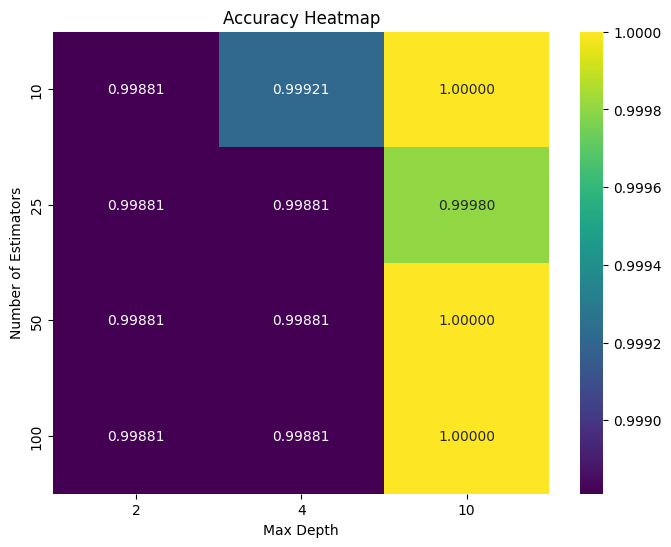

In [297]:
plt.figure(figsize=(8, 6))
sns.heatmap(accuracies, annot=True, fmt=".5f", cmap="viridis", 
            xticklabels=depths, yticklabels=number_trees)

# Add labels and title
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.title('Accuracy Heatmap')
plt.show()

5. (5 points) Could the above training/testing setup potentially lead to wrong conclusions regarding the best hyperparameter setting? If so, describe why, and how you would address the problem. (Hint: think about how you’re making use of the data during training and testing).

Quite small data + only 10% in the test split so the conclusions raised from predictions of the test data might be biased

Test data is splitted in a random way > depending on how well it represents the training data, the conclusions can be more or less close to reality

Adress the problem by splitting into train, validation and test sets ensuring the test set remains untouched during training and hyperparameter tuning. This approach allows the generalization of conclusions to unseen data.

Adress the problem by using cross-validation to analyse the model performance

6. (7 points) Implement your solution to the problem you’ve identified in the previous subquestion (5), and show and describe your results.

In [300]:
precisions_cross_val

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

7. (5 points) Finally, Professor Oak wants to know what the most predictive features are. Plot feature importance as a bar plot representing the 10 most predictive variables.

In [313]:
top_indices = sorted_indices[:10]
top_indices

array([ 0, 47,  8, 25,  3, 14,  7,  4, 15,  9], dtype=int64)

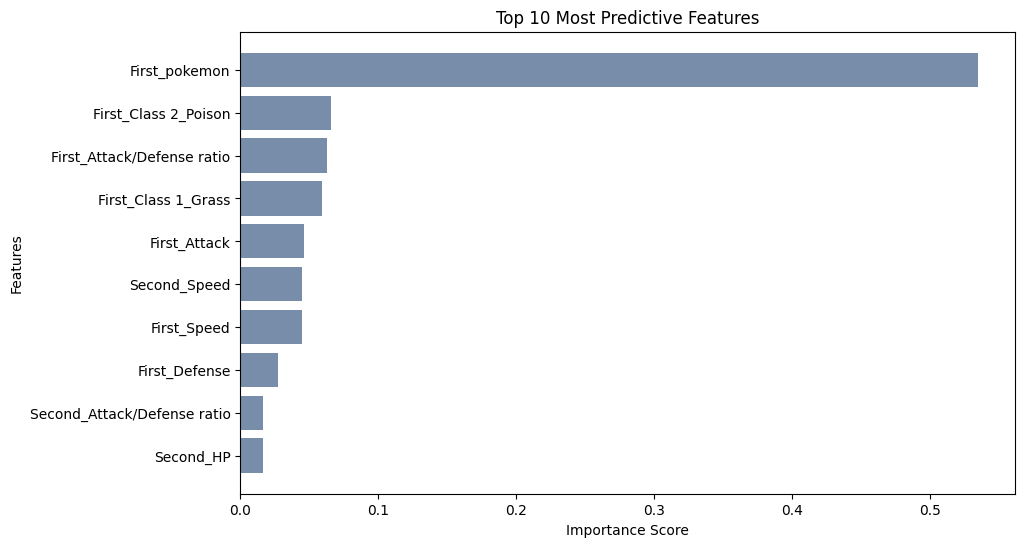

In [318]:
feature_names = X.columns

sorted_indices = np.argsort(importances[2])[::-1]
top_indices = sorted_indices[:10]

top_features = [feature_names[i] for i in top_indices]
top_importances = importances[2][top_indices]

plt.figure(figsize=(10, 6))
plt.barh(top_features[::-1], top_importances[::-1], color="#778da9")

plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Most Predictive Features")
plt.show()

## Question 3: Ranking - 30 points
Something the new Pokedex is missing is a smart way of ranking the Pokémon. As the dataset Professor Oak gave you contains the outcome of a large number of battles, the idea is to use this data to come up with a way of sorting the Pokémon from strongest to weakest.

1. (5 points) Compute the winning ratio (number of wins divided by number of battles) for all Pokémon. Show the 10 Pokémon with the highest ratio and describe what they have in common with respect to their features. Discuss your results about feature importance from question 2.7 (regarding feature importance) in this context.

In [364]:
# Number of wins => count number of time that a Pokemon id appears in Winner column
# Add a new column in pokemon_df dataset
nb_wins = combats_df["Winner"].value_counts()
ranked_pokemon_df = pd.merge(pokemon_df, nb_wins, how='outer', left_on="pid", right_on="Winner")
ranked_pokemon_df.rename(columns={'count': 'Number of Wins'}, inplace=True)
ranked_pokemon_df["Number of Wins"].fillna(0)

# Number of battles => counts number of time that a Pokemon id appears in First_pokemon & Second Pokemon
nb_battles = combats_df["First_pokemon"].value_counts() + combats_df["Second_pokemon"].value_counts()
nb_battles.index.name = "Battles"
nb_battles.fillna(0)
ranked_pokemon_df = pd.merge(ranked_pokemon_df, nb_battles, how='outer', left_on="pid", right_on="Battles")
ranked_pokemon_df.rename(columns={'count': 'Number of Battles'}, inplace=True)
ranked_pokemon_df

# Winning ratio 
ranked_pokemon_df["Winning ratio"] = ranked_pokemon_df["Number of Wins"] / ranked_pokemon_df["Number of Battles"]
ranked_pokemon_df.sort_values(ascending=False, by=['Winning ratio']).head(10)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Attack/Defense ratio,Number of Wins,Number of Battles,Winning ratio
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False,1.588235,127.0,129.0,0.984496
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,False,1.846154,116.0,119.0,0.974790
703,704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,True,1.250000,121.0,125.0,0.968000
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False,3.750000,115.0,119.0,0.966387
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False,1.615385,136.0,141.0,0.964539
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False,1.446809,124.0,129.0,0.961240
726,727,Greninja,Water,Dark,72,95,67,103,71,122,False,1.417910,122.0,127.0,0.960630
716,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,False,1.422222,118.0,123.0,0.959350
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,True,2.142857,119.0,125.0,0.952000
349,350,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,False,2.000000,114.0,120.0,0.950000


What to they have in common? high speed + high attack/defense ratio

Pokemon classes do not seem to be related to the winning ratio

Pokémon tournaments can be represented as a so-called _dominance graph_. The dominance graph is a directed graph in which each Pokémon is represented by one vertex, and directed edges point from stronger to weaker Pokémons: in particular, if Pokémon _i_ has won a strictly larger number of times against Pokémon _j_ than _j_ has won against _i_ (that is, if _i_ dominates _j_), there is a directed edge pointing from node _i_ to node _j_. The dominance graph can be represented as an adjacency matrix _G_ where entry _G_<sub>_ij_</sub> is 1 if there is an edge pointing from _i_ to _j_, and 0 otherwise.

2. (10 points) A simple method for identifying the strongest Pokémon using this graph is to compute the matrix _A_ = _G_ + _G_<sup>2</sup>. Consider a given row of _A_; summing up all elements of that row results in a dominance score for the respective Pokémon. Explain what this score represents and why it may be interpreted as capturing the dominance of a Pokémon.

G is the adjacency matrix > G represents the direct dominance relationships, with 𝐺𝑖𝑗=1 if Pokémon i dominates Pokémon j directly

what does G^2 represent? G^2 represents the indirect dominance relationships, where 𝐺𝑖𝑗^2 captures the dominance relationship that can be traced through one intermediate Pokémon.

why is it useful to sum G and G^2 > When you sum the elements of a given row of matrix 𝐴, you're computing the dominance score for that specific Pokémon. The higher the score for a Pokémon, the more Pokémon it dominates (directly or indirectly), indicating that the Pokémon is stronger.

3. (7 points) Compute _A_ and extract the 10 Pokémon with the highest dominance score.

In [379]:
G = np.zeros((len(pokemon_df), len(pokemon_df)), dtype=float)
summary_combats = pd.DataFrame(combats_df.value_counts())
summary_combats

#for row in summary_combats.iterrows():
#    G[row['First_pokemon'], row['Second_pokemon']] = row.value


count
First_pokemon Second_pokemon Winner       
68            451            451         3
707           702            702         3
116           161            116         3
671           539            539         3
712           49             712         3
...                                    ...
274           461            461         1
              531            531         1
              540            540         1
              577            274         1
800           775            800         1

[48048 rows x 1 columns]

4. (3 points) Compare the ranking by dominance scores with the ranking by winning ratio (cf. subquestion 1 above). What do you observe? How do you explain the differences (if any)?
5. (5 points) Professor Oak is really keen on featuring a solid ranking mechanism in the new Pokedex, so you need to make a decision: Which scoring method is better, that based on winning ratio or that based on dominance scores? Support your opinion with explanations and examples.